#Evaluación Final Módulo 6

#Parte I
1. La principal diferencia entre los métodos supervisados (I) y no supervisados (II) es que:

a) (I) requieren que el usuario especifique algunos hiperparámetros.

b) (II) no tienen restricciones y/o supuestos.

c) (I) usan la variable respuesta para entrenar el modelo.

d) (II) se aplican a problemas autónomos.


In [40]:
"""
respuesta: c)

 (I) usan la variable respuesta para entrenar el modelo.

"""

'\nrespuesta: c)\n\n (I) usan la variable respuesta para entrenar el modelo.\n\n'


2. Considere las siguientes afirmaciones:

(i) PCA es un método no supervisado.

(ii) Todos los componentes principales de un PCA son ortogonales entre si. (falso: son respecto a las variables originales)

(iii) PCA busca las direcciones en las que los datos tienen la mayor varianza.

(iv) El número máximo de componentes principales es menor o igual al número de variables (falso: es menor).

Elija la opción con el mayor número de ítems correctos:

a) (i) e (iii).

b) (ii) e (iii).

c) (i), (ii) e (iii).

d) (i), (ii), (iii) e (iv).

In [41]:
"""
respuesta: a)

(i) PCA es un método no supervisado.
(iii) PCA busca las direcciones en las que los datos tienen la mayor varianza.

"""

'\nrespuesta: a)\n\n(i) PCA es un método no supervisado.\n(iii) PCA busca las direcciones en las que los datos tienen la mayor varianza.\n\n'

3. Como parte de un análisis de datos se analizaron 11 indicadores económicos y sociales de 96 países. Las variables observadas son:

X1: Tasa anual de crecimiento de la población,

X2: Tasa de mortalidad infantil por cada 1000 nacidos vivos,

X3: Porcentaje de mujeres en la población activa,

X4: PNB en 2005 (en millones de dólares),

X5: Producción de electricidad (en millones kW/h),

X6: Líneas telefónicas por cada 1000 habitantes,

X7: Consumo de agua per c ́apita,

X8: Proporción de la superficie del país cubierta por bosques,

X9: Proporción de deforestación anual,

X10: Consumo de energía per cápita,

X11: Emisión de CO2 per cápita.

Dada la gran cantidad de variables se aplicó un análisis de componentes principales, utilizando la matriz de correlación, donde los vectores de carga de las dos primeras componentes son:


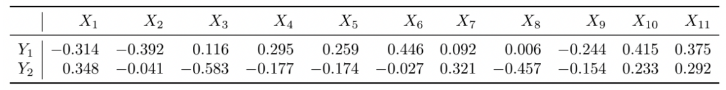

A partir de de la información anterior, se puede concluir que:

a) El porcentaje de variabilidad explicado por las dos primeras componentes es 63.45%.

b) Asumiendo las condiciones necesarias sobre las componentes no reportadas, entonces es posible que las variables X2, X6, X10 y X11 son las que más contribuyen en la primera componente principal.

c) Asumiendo las condiciones necesarias sobre las componentes no reportadas, entonces es posible que las variables X2, X6, X10 y X11 son las que más contribuyen en la segunda componente principal.

d) No es posible interpretar los resultados anteriores debido a que es un error haber utilizado la matriz de correlación y en su lugar se debería haber utilizado la matriz de covarianzas.

In [42]:
"""
respuesta: d)

No es posible interpretar los resultados anteriores debido a que es un error haber utilizado la matriz de correlación y en su lugar
se debería haber utilizado la matriz de covarianzas.
"""

'\nrespuesta: d)\n\nNo es posible interpretar los resultados anteriores debido a que es un error haber utilizado la matriz de correlación y en su lugar \nse debería haber utilizado la matriz de covarianzas.\n'

4. Considere las siguientes observaciones:

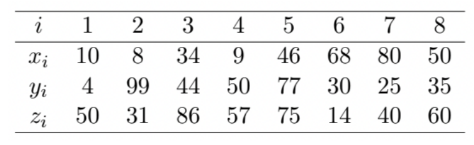

Sin escalar las variables, describa tres iteraciones del algoritmo K-means para k = 2. Use los centroides C1 = (47.5, 37.5, 21.8) y C2 = (53.2, 22.4, 75.3).

Observación: El objetivo del ejercicio es saber si comprenden como funcionan internamente el algoritmo, así que no basta con sólo la respuesta en Python u otro lenguaje. Aunque sí se pueden apoyar en algún software para los cálculos de cada paso.

In [43]:
import numpy as np

#Definición de puntos matriz 8x3
#representa las variables X,Y,Z
observaciones = np.array([
    [10,8,34,9,46,68,80,50],
    [4,99,44,50,77,30,25,35],
    [50,31,86,57,75,14,40,60]
]).transpose()

# crea centroides matriz 2x3
# fila 0 = primer centroide o centroide 1
# fila 1 = segundo centroide o centroide 2
centroides=np.array([
    [47.5,37.5,21.8],
    [53.2,22.4,75.3]
])

In [44]:
def distancia_euclideana(punto_xyz, centroide):
  """
  función calcula distancia euclidiana
  corresponde al calculo de la hipotenusa
  input: punto, centroide
  output: distancia
  """
  # devuelve el largo de la hipotenusa
  return np.sqrt(np.sum((punto_xyz - centroide)**2))

def dist_al_centroide(centroides, observaciones):
  """
  funcion que calcula la distancia entre un punto xyz a cada uno de los centroide
  input : centroides, observaciones
  output: distancias, puntosXYZ
  """
  distancias = []
  puntos_xyz = []
  for observacion_xyz in observaciones:
      # cada punto corresponde a una fila de la matriz (x,y,z)
      # recupera la distancia entre el punto y el centroide
      # cada punto (x,y,z) se mide con cada uno de los centroides
      distancia_al_centroide = [distancia_euclideana(observacion_xyz, centroide) for centroide in centroides]
      distancias.append(distancia_al_centroide)
      puntos_xyz.append(observacion_xyz)
  return distancias, puntos_xyz

def asigna_puntos_xyz_a_centroides_a_menor_distancia(centroides, puntos_xyz, distancias):
  """
  función para asignar cada punto de coordenadas xyz al centroide que le queda más próximo
  imput: centroides, puntos_xyz, distancias
  output: clusteres
  """
  # se crea un cluster según el tamaño de los centroides
  clusteres = [[] for _ in range(len(centroides))]
  # recorre cada punto y sus distancias a los dos centroides para determinar que
  # cada punto sea asignado al centroide que le queda a menor distancia
  for i in range(len(puntos_xyz)):
      # extrae el punto de coordenadas xyz
      punto_xyz = puntos_xyz[i]
      # extrae el par de distancias a los centroides 1 y 2 del punto xyz
      distancia = distancias[i]
      # busca la distancia menor desde el punto xyz a uno de los 2 centroides, la menor distancia
      # extre el indice de la distancia menor para almacenarla como el centroide al que ingresa
      # este puede ser 0 ó 1 dependiendo de la fila o índice del centroide
      indice_del_centroide = np.argmin(distancia)
      # asigna el punto xyz al centroide 1 o centroide 2 según su índice
      clusteres[indice_del_centroide].append(punto_xyz)
  return clusteres

def calcula_nuevos_centroides(clusteres):
  # proceso para reubicar posición o definir los centroides de cada agrupamiento
  # se calcula a cada grupo y se hace en base a todos los elementode que lo conforman
  # su largo depende de la cantidad de clusteres existentes
  nuevos_centroides = []
  for cluster in clusteres:
      # determina la media o promedio entre las distancias de todos puntos
      # como cada centroide es una matriz, la suma se realiza por columnas,
      # las columnas correspoden a las coordenadas de ejes x, y, z
      # el promedio corresponde a cada eje
      centroide = np.mean(cluster, axis=0)
      nuevos_centroides.append(centroide)
  return nuevos_centroides

def visualiza_clusteres(lista):
  for inx, fila in enumerate(lista):
      print(f"centroide {inx+1}: {[list(fila[i]) for i in range(len(fila))]}")

def visualiza_centroides(lista):
  for inx, fila in enumerate(lista):
      print(f"centroide {inx+1}: {fila}")

In [45]:
#  tres iteraciones del algoritmo K-means para k = 2
iteraciones=3
clusteres=[]
for it in range(3):
  print(f"\n ITERACION {it+1} ---------------------------------------")

  #calcula la distancia entre un punto xyz y cada uno de los centroides
  distancias, puntos_xyz = dist_al_centroide(centroides, observaciones)

  # calcula o agrupa en los clusters
  # cada punto de coordenada xyz se asigna a al centroide más cercano
  clusteres = asigna_puntos_xyz_a_centroides_a_menor_distancia(centroides, puntos_xyz, distancias)

  # visualiza la conformación de los clusteres
  print("\nlos cluster quedan conformados de la siguiente forma")
  visualiza_clusteres(clusteres)

  # proceso para reubicar posición o definir los centroides de cada agrupamiento
  # esto debido a que si ingresó un nuevo elemento o salió el centroide podría no estar
  # ubicado en el centro del grupo, entonves se debe chequear y reubicar si es necesario
  centroides = calcula_nuevos_centroides(clusteres)
  # visualiza los nuevos centroides generados por cada cluster
  print("\nLos nuevos centroides son los siguientes")
  visualiza_centroides(centroides)

print("\nLos puntos de coordenada xyz que conforman cada centroide son:")
for inx, cluster in enumerate(clusteres):
    print(f"\nCluster {inx+1}:")
    print("  X  Y  Z")
    for punto_xyz in cluster:
        print(punto_xyz)


 ITERACION 1 ---------------------------------------

los cluster quedan conformados de la siguiente forma
centroide 1: [[8, 99, 31], [9, 50, 57], [68, 30, 14], [80, 25, 40]]
centroide 2: [[10, 4, 50], [34, 44, 86], [46, 77, 75], [50, 35, 60]]

Los nuevos centroides son los siguientes
centroide 1: [41.25 51.   35.5 ]
centroide 2: [35.   40.   67.75]

 ITERACION 2 ---------------------------------------

los cluster quedan conformados de la siguiente forma
centroide 1: [[8, 99, 31], [68, 30, 14], [80, 25, 40]]
centroide 2: [[10, 4, 50], [34, 44, 86], [9, 50, 57], [46, 77, 75], [50, 35, 60]]

Los nuevos centroides son los siguientes
centroide 1: [52.         51.33333333 28.33333333]
centroide 2: [29.8 42.  65.6]

 ITERACION 3 ---------------------------------------

los cluster quedan conformados de la siguiente forma
centroide 1: [[8, 99, 31], [68, 30, 14], [80, 25, 40]]
centroide 2: [[10, 4, 50], [34, 44, 86], [9, 50, 57], [46, 77, 75], [50, 35, 60]]

Los nuevos centroides son los sig

Determinadas arbitrariamente las posiciones de los 2 centroides en el plano del espacio muestral, se busca agrupar en k= 2 clusters
o grupos que podria existir en los datos, así, cada centroide conformará un grupo.

De acuerdo al número k=2 se creran 2 grupos o cluster:
- El algoritmo toma el primer o el siguiente elemento y mide la distancia euclidiana desde su posición hacia todos los centroides.
- Luego se identifica cual distancia a los centroides fue la menor y el elementos se asigna temporalmente al centroide o grupo más
  cercano.
- Esto se repite por cada elemento en el "plano"
- Una vez finalizado este proceso por cada elemento, el centroide se deberá reubicar temporalmente al centro de cada agrupación,
  dicha nueva posición del centroide se calcula en base al promedio (mean) de los datos que conforman su cluster.
- Es así que, eventualmente los centroides iran cambiando de posición hasta llegar a ubicarse "al centro" de cada grupo de datos a
  medida que se van conformando los potenciales cluster.
- Este ajuste, la nueva posición del centroide, ocasiona que la distancia entre cada elemento y el centroide asignado cambie, por lo
  que en la siguiente iteración, una vez calculada la distancia a todos los centoides, eventualemnte el elementos podría ser
  reasignado a otro grupo o cluster.
- Si luego del ajuste, la posición de los centoides no cambia, es señal del final del algoritmo.

Concluidas las iteraciones se cuanta con grupos bien definidos con cada elemento asignado a ellos.

In [46]:
# simulación del algoritmo kmean con k=2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

i_df = pd.DataFrame({"X" : [10,8,34,9,46,68,80,50],
                         "Y" : [4,99,44,50,77,30,25,35],
                         "Z" : [50,31,86,57,75,14,40,60]
                         },
                        index=["1","2","3","4","5","6","7","8"])

initial_centroids = [[47.5, 37.5, 21.8], [53.2, 22.4, 75.3]]


escalador = MinMaxScaler().fit(i_df.values)
i_df = pd.DataFrame(escalador.transform(i_df.values),
                       columns=["X", "Y", "Z"])

# Crear el objeto KMeans con los centroides iniciales
# utiliozando el parámetro init
kmeans = KMeans(n_clusters=2, init=initial_centroids).fit(i_df.values)
i_df["cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 600x800 with 0 Axes>

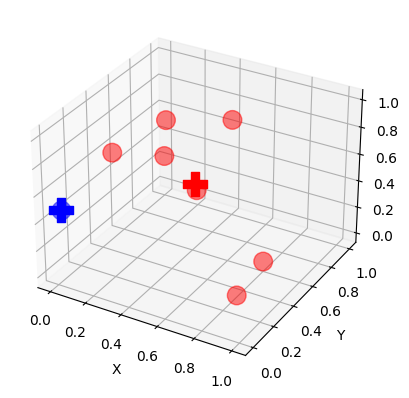

In [47]:
# Instrucciones para graficar los clusters
plt.figure(figsize=(6, 8), dpi=100)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colores = ["red", "blue", "orange"]

for cluster in range(kmeans.n_clusters):
    ax.scatter(i_df[i_df["cluster"] == cluster]["X"],
                i_df[i_df["cluster"] == cluster]["Y"],
                i_df[i_df["cluster"] == cluster]["Z"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    ax.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                kmeans.cluster_centers_[cluster][2],
                marker="P", s=280, color=colores[cluster])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

5. Enuncie al menos tres diferencias entre el análisis factorial y el método de componentes principales.

In [48]:
"""
El Análisis Factorial y el Análisis de Componentes Principales están muy relacionados.

1. El Análisis Factorial supone que existe un factor común subyacente a todas las variables,
   el Análisis de Componentes Principales no hace tal asunción
2. En el Análisis Factorial se distingue entre varianza común y varianza única.
   el Análisis de Componentes Principales no hace esa distinción entre los dos tipos de varianza, se centra en la varianza total.
3. Mientras que el Análisis de Componentes Principales busca hallar combinaciones lineales de las variables originales que expliquen
   la mayor parte de la variación total,
   el Análisis Factorial pretende hallar un nuevo conjunto de variables, menor en número que las variables originales, que exprese
   lo que es común a esas variables.
4. En el análisis de componentes principales, los componentes se calculan como combinaciones lineales de las variables originales.
   En el análisis factorial, las variables originales se definen como combinaciones lineales de los factores.
5. En el análisis de componentes principales, la meta es explicar tanta proporción de la varianza total en las variables como sea
   posible.
   La meta en el análisis factorial es explicar las covarianzas o correlaciones entre las variables.

Un ejemplo simplificado de uso de PCA:
Supóngase un equipo de investigación que se encarga de clasificar los tumores de pacientes en 3 subtipos.
Dependiendo del subtipo, el paciente recibe una medicación diferente. El proceso de caracterización se hace mediante tinciones y
observaciones al microscopio. Este proceso es muy laborioso y lento, lo que incrementa mucho el tiempo de respuesta de los médicos.
Nuevos estudios apuntan a que cuantificando la expresión de un grupo de 9 genes se podría clasificar los tumores con una alta
precisión. Se quiere determinar si tal patrón existe dentro de los datos

"""

'\nEl Análisis Factorial y el Análisis de Componentes Principales están muy relacionados. \n\n1. El Análisis Factorial supone que existe un factor común subyacente a todas las variables, \n   el Análisis de Componentes Principales no hace tal asunción\n2. En el Análisis Factorial se distingue entre varianza común y varianza única. \n   el Análisis de Componentes Principales no hace esa distinción entre los dos tipos de varianza, se centra en la varianza total.\n3. Mientras que el Análisis de Componentes Principales busca hallar combinaciones lineales de las variables originales que expliquen\n   la mayor parte de la variación total, \n   el Análisis Factorial pretende hallar un nuevo conjunto de variables, menor en número que las variables originales, que exprese \n   lo que es común a esas variables. \n4. En el análisis de componentes principales, los componentes se calculan como combinaciones lineales de las variables originales. \n   En el análisis factorial, las variables originale

6. ¿Qué significa que el método de clusterización sea jerárquico?

In [49]:
"""
Significa que el método en cada iteración organiza los elementos, en este caso grupos o clusters, en una estructura jerarquica tipo árbol, creando una
serie de agrupaciones anidadas donde los grupos más pequeños se combinan o unen gradualmente para formar un grupo más grande o
único cluster.

Este procedimiento intenta identificar grupos relativamente homogéneos de casos (o de variables) basándose en las características
seleccionadas, mediante un algoritmo que comienza con cada caso (o cada variable) en un clúster diferente y combina los clústeres
hasta que sólo queda uno.
"""

'\nSignifica que el método en cada iteración organiza los elementos, en este caso grupos o clusters, en una estructura jerarquica tipo árbol, creando una \nserie de agrupaciones anidadas donde los grupos más pequeños se combinan o unen gradualmente para formar un grupo más grande o \núnico cluster.\n\nEste procedimiento intenta identificar grupos relativamente homogéneos de casos (o de variables) basándose en las características \nseleccionadas, mediante un algoritmo que comienza con cada caso (o cada variable) en un clúster diferente y combina los clústeres \nhasta que sólo queda uno.\n'

Parte II
Suponga que tenemos una empresa, cuya área de marketing, desea generar una clusterización
para poder tener mayor éxito con sus campañas. Para esto nos entrego una base de datos
(llamada evaluación_mkt_campaign.csv) que contiene los siguientes campos:
1. ID: Identificador único de cliente
2. Age: Edad del cliente
3. Seniority: Días desde el enrolamiento del cliente
4. Children: Numero hijos
5. Ingreso: Ingreso anual del cliente
6. Recency: Días desde la ́ultima compra del cliente
7. MntWines: Gasto en vino en los últimos 2 años
8. MntFruits: Gasto en fruta en los últimos 2 años
9. MntMeatProducts: Gasto en carne en los últimos 2 años
10. MntFishProducts: Gasto en pescado en los últimos 2 años
11. MntSweetProducts: Gasto en dulces en los últimos 2 años
12. MntGoldProds: Gasto en oro en los últimos 2 años
13. NumDealsPurchases: Numero de compras realizada bajo descuento
14. NumWebPurchases: Numero de compras realizadas por la web
15. NumCatalogPurchases: Numero de compras realizadas por catálogo
16. NumStorePurchases: Numero de compras realizadas en la tienda
17. NumWebVisitsMonth: Numero de visitas a la pagina web

In [50]:
!pip install umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
# leer datos y crea dataframe
mkt_df=pd.read_csv("evaluacion_mkt_campaign.csv")
mkt_df.head(3)

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0


#Observación:
* la variable "`MntFruits`: Gasto en fruta en los últimos 2 años" no esta incluida en el dataset

En base a estos datos, realice lo siguiente:

#Búsqueda de Anomalías: Usando las columnas de comportamiento de compra, encuentre registros anómalos correspondientes al 5% de la muestra, y descártelos.

In [52]:
# define columnas de comportamiento de compras
purchases=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
# crea dataframe que contiene sólo compras
mkt_purchases_df=mkt_df[purchases]
mkt_purchases_df.head(3)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10


In [53]:
# Una forma de hallar anomalias de forma visual es por medio de gráfico de caja y vigote ya que utiliza las medianas de los datos para
# generar los cuartiles y esto puede dejar en evidencia los valores atípicos.

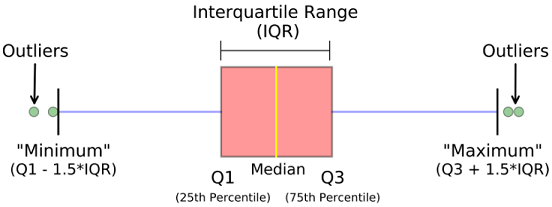

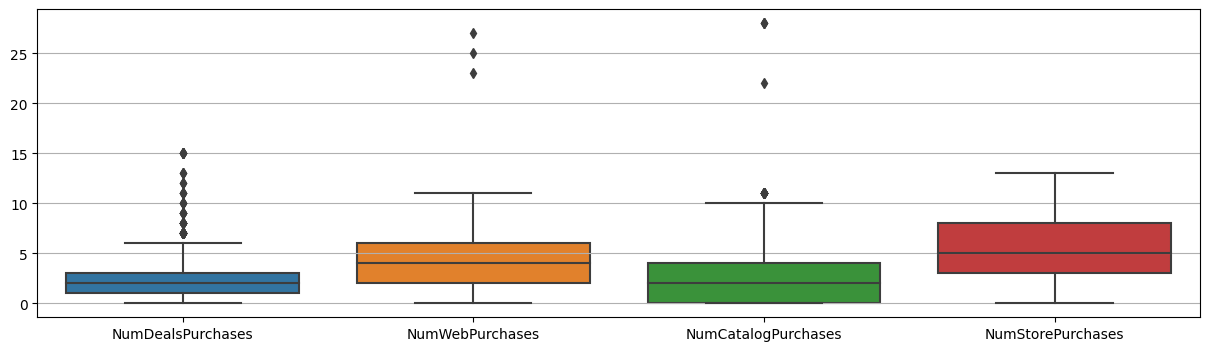

In [54]:
# visualizando columnas de comportamiento de compra
plt.figure(figsize = (15,4))
plt.grid()
p = sns.boxplot(data=mkt_purchases_df)

#Se probarén 2 métodos para descartar el 5% de los datos atípicos porque no tengo claro debido a mi falta de experiencia, cual es la forma correcta de aplicar esta selección, esto dependerá del resultado entregado por cada uno.

Alternativa 1: Se calcula el 5% de los datos atípicos por cada variable de compra, así cada variable se utilizará como filtro del total de los datos del dataset, el proceso se itera por cada una.

Alternativa 2: Se calcula el 5% de los datos atípicos del total acumulado de las variables de compras, el filtro se aplicará considerando un intervalo de confianza 95% (cuantil 2.5, cuantil 97.5)

Alternativa 3: Se calcula el 5% de los datos atípicos del total acumulado de las variables de compras, el filtro se aplicará sólo una vez al dataset.


#Alternatiava 1

In [55]:
# Alternativa 1
# eliminación selectiva con variables compras
num_reg_1=mkt_df.shape[0]
print("total registros antes de eliminar outliers", num_reg_1)

# fija percentil aceptable
k=95
for columna in mkt_purchases_df.columns.values:
  percentil = mkt_purchases_df[columna].quantile(k/100)
  mkt_df=mkt_df[mkt_purchases_df[columna] <= percentil]

num_reg_2=mkt_df.shape[0]
print("total registros después de eliminar outliers", num_reg_2)
print(f"se eliminaron {num_reg_1-num_reg_2} outliers, un {(num_reg_1-num_reg_2)/num_reg_1*100:.0f}%")

total registros antes de eliminar outliers 2216
total registros después de eliminar outliers 1916
se eliminaron 300 outliers, un 14%


<ipython-input-55-63dc36311a60>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt_df=mkt_df[mkt_purchases_df[columna] <= percentil]
<ipython-input-55-63dc36311a60>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt_df=mkt_df[mkt_purchases_df[columna] <= percentil]
<ipython-input-55-63dc36311a60>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mkt_df=mkt_df[mkt_purchases_df[columna] <= percentil]


#Alternatiava 2

In [56]:
# Alternativa 2
# cuantil 2.5, cuantil 97.5

# recupera datos originales
mkt_df=pd.read_csv("evaluacion_mkt_campaign.csv")

# se agrega una columna al dataset para acumular valores de cada registro
# esta columna será filtrada con el quartil de los datos a utilizar

mkt_df['acumulado'] = mkt_purchases_df.sum(axis=1)
# eliminación selectiva con variables compras
num_reg_1=mkt_df.shape[0]
print("total registros antes de eliminar outliers", num_reg_1)

# fija percentil aceptable
k=95
percentil = mkt_df.acumulado.quantile([0.025,0.975])
mkt_df=mkt_df[mkt_df.acumulado <= percentil[0.975]]
mkt_df=mkt_df[mkt_df.acumulado >= percentil[0.025]]
num_reg_2=mkt_df.shape[0]
print("total registros después de eliminar outliers", num_reg_2)
print(f"se eliminaron {num_reg_1-num_reg_2} outliers, un {(num_reg_1-num_reg_2)/num_reg_1*100:.0f}%")

total registros antes de eliminar outliers 2216
total registros después de eliminar outliers 2159
se eliminaron 57 outliers, un 3%


#Alternatiava 3

In [57]:
# Alternativa 3
# percentil 95%

# recupera datos originales
mkt_df=pd.read_csv("evaluacion_mkt_campaign.csv")

# se agrega una columna al dataset para acumular valores de cada registro
# esta columna será filtrada con el quartil de los datos a utilizar
mkt_df['acumulado'] = mkt_purchases_df.sum(axis=1)
# eliminación selectiva con variables compras
num_reg_1=mkt_df.shape[0]
print("total registros antes de eliminar outliers", num_reg_1)

# fija percentil aceptable
k=95
percentil = mkt_df.acumulado.quantile(k/100)
mkt_df=mkt_df[mkt_df.acumulado <= percentil]

num_reg_2=mkt_df.shape[0]
print("total registros después de eliminar outliers", num_reg_2)
print(f"se eliminaron {num_reg_1-num_reg_2} outliers, un {(num_reg_1-num_reg_2)/num_reg_1*100:.0f}%")

total registros antes de eliminar outliers 2216
total registros después de eliminar outliers 2116
se eliminaron 100 outliers, un 5%


#Conclusión: Este último método arroja el porcentaje de outlier a eliminar que es requerido por el ejercicio.

In [58]:
# split de los datos
# variables explicativas
X = mkt_df.drop(['acumulado','Income'], axis=1)
# variable objetivo candidata
y = mkt_df.Income

# Estandarización de los datos
datos_standarizados_df = pd.DataFrame(StandardScaler().fit_transform(X))

#Feature Extraction: Usando los datos filtrados reduzca el numero de variables. Busque una representación que le permita explicar un 90% de la varianza original de los datos.

In [59]:
# Perform PCA
# Keep components explaining 80% of variance
pca = PCA(n_components=0.9)
pca.fit(datos_standarizados_df)
datos_pca = pca.transform(datos_standarizados_df)

# Take the principal components that explain % of the variance
n_components = datos_pca.shape[1]
print(f'Number of components: {n_components}')
print("\nVarianza explicada por cada componente:", pca.explained_variance_)
print("\nProporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

Number of components: 11

Varianza explicada por cada componente: [5.21494441 1.77758645 1.16402894 1.04720521 0.96164755 0.83404094
 0.737137   0.65841073 0.56859089 0.47080108 0.41263191]

Proporción de varianza explicada por cada componente: [0.34749866 0.11844976 0.07756526 0.06978069 0.06407954 0.05557645
 0.04911924 0.0438733  0.03788815 0.03137191 0.02749579]


Clustering:

a) Usando los resultados anteriores clusterice el comportamiento de sus clientes. El área de marketing solicitó que el número de clusters sea no mayor a 8. Encuentre el número óptimo de
clusters considerando esa restricción

In [60]:
# convierte a dtaframe los principales componentes
df = pd.DataFrame(datos_pca)

# SSE scores
sse_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:

    # Fit the k-means model
    kmeans = KMeans(
        n_clusters=k,
        n_init='auto',
        random_state=42
    )

    kmeans.fit(df)

    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

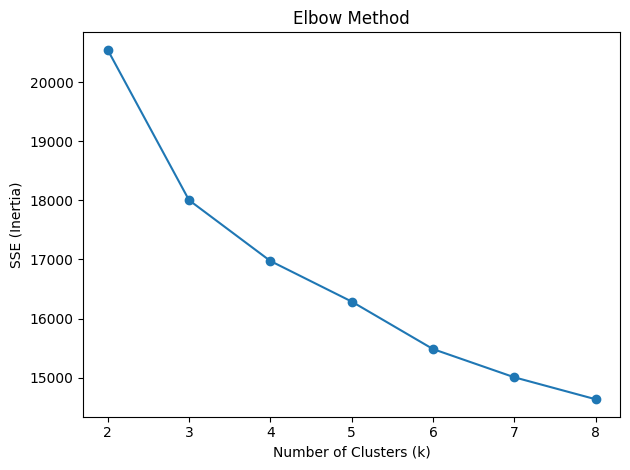

In [61]:
# Plot SSE
fig, ax = plt.subplots()
ax.plot(k_values, sse_scores, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE (Inertia)')
ax.set_title('Elbow Method')

plt.tight_layout()

In [62]:
print("el número óptimo de clusters considerando esa restricción es 3")

el número óptimo de clusters considerando esa restricción es 3


b) Reporte los centroides de cada cluster en términos de las variables originales.

In [63]:
print("Los centroides para los clusters requeridos son:\n",pca.inverse_transform(kmeans.cluster_centers_))

Los centroides para los clusters requeridos son:
 [[ 0.10403743  0.06674615  0.73635828  0.9640802   0.83854511  0.33062626
   0.4328666  -0.66801848  0.08055808  1.03223441  0.76582564 -1.23844188
   0.90908573 -0.64357005 -1.01006454]
 [-0.83051126 -0.09724802 -0.73918664 -0.61177638 -0.47542211 -0.50010551
  -0.46933888 -0.28567838 -0.63208474 -0.76548378 -0.78831513  0.62783533
  -0.55786108  0.24590362 -0.01437569]
 [-0.00467636  0.12328234  0.39326904  1.12533569  1.78195866  2.44703743
   0.93216517 -0.40257407  0.97858905  0.94896301  0.77936671 -0.89808993
   0.06440056  0.21596961 -0.62623182]
 [-0.11580985  0.33865332 -0.7184896  -0.67785884 -0.64639836 -0.48392445
  -0.59227249 -0.09243214 -0.74031122 -0.62205575 -0.71784186 -0.00584004
   0.58948933 -0.76232612  0.90097789]
 [-0.06590486 -0.00467202 -0.04091324 -0.41691761 -0.15499958 -0.43807581
   0.10059846  2.01174411  0.6026161  -0.23663733  0.09030213  0.99181799
   0.0824481   0.46178604  1.08962013]
 [-0.06682486 -

In [64]:
#Crear instancia de kmeans para hallar las 3 agrupaciones
k=3
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)

#Entrenar modelo
kmeans.fit(datos_pca)


KMeans(n_clusters=3, n_init='auto', random_state=42)

<Figure size 600x800 with 0 Axes>

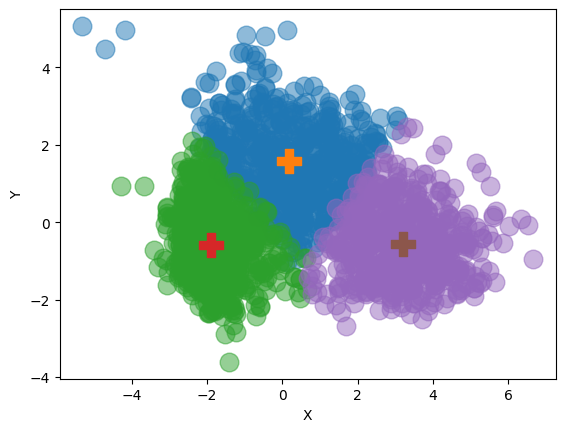

In [65]:
# Instrucciones para graficar los clusters
df["cluster"] = kmeans.labels_
plt.figure(figsize=(6, 8), dpi=100)
fig = plt.figure()
ax = fig.add_subplot()

for cluster in range(kmeans.n_clusters):
    ax.scatter(df[df["cluster"] == cluster][0],
                df[df["cluster"] == cluster][1],
                marker="o", s=180,
               alpha=0.5)

    ax.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [66]:
#Obtener los máximos
cluster = ["Cluster_1", "Cluster_2", "Cluster_3"]
variables = X.columns.to_list()
df_centroides = pd.DataFrame(dict(zip(cluster, pca.inverse_transform(kmeans.cluster_centers_))), index=variables).abs()

max_index = df_centroides.idxmax()
max_value = df_centroides.max()

max_df = pd.DataFrame({'Variable': max_index, 'Centroide': max_value})

print("Valores Máximos Absolutos Centroides: ")
print()
print(max_df)

Valores Máximos Absolutos Centroides: 

                    Variable  Centroide
Cluster_1  NumDealsPurchases   0.937666
Cluster_2  NumStorePurchases   0.776592
Cluster_3    MntMeatProducts   1.292253


Interprete.

In [67]:
# Los centroides identificaron las 3 variables que presentan un patrón de agrupamiento respecto a los clientes, se logra clasificar
# a un conjunto de individuos en grupos homogéneos, este caso, las variables "NumDealsPurchases","NumStorePurchases","MntMeatProducts"
# dan señales de un comportamiento que puede ser considerado relevante y digno de análisis por el área de marketing.